In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [27]:
df = df.rename({'Life expectancy at birth (years)':'Life_Exp'}, axis = 'columns')
print(df.head())

  Country  Year  Life_Exp           GDP
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10


In [32]:
countries = list(df['Country'].unique())
print(countries)

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


In [31]:
years = list(df['Year'].unique())
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [33]:
dfMean = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()
print(dfMean)

                    Country  Life_Exp           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


In [34]:
dfMedian = df.drop('Year', axis = 1).groupby('Country').median().reset_index()
print(dfMedian)

                    Country  Life_Exp           GDP
0                     Chile     79.00  1.729975e+11
1                     China     74.45  4.075195e+12
2                   Germany     79.85  3.396350e+12
3                    Mexico     75.65  1.004376e+12
4  United States of America     78.15  1.445000e+13
5                  Zimbabwe     47.40  6.733671e+09


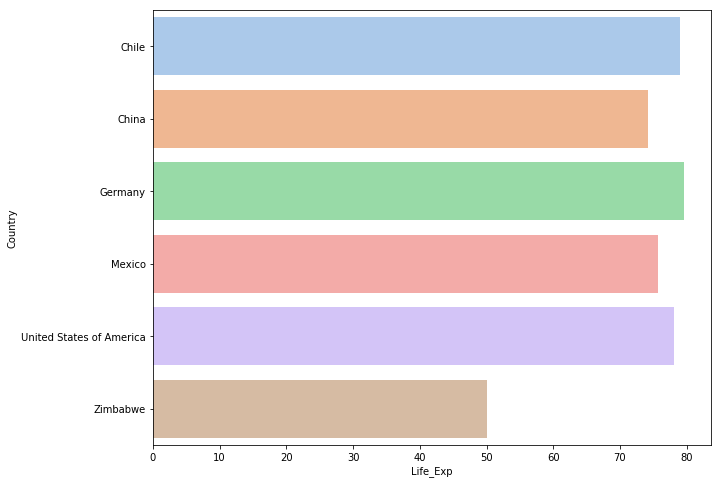

In [78]:
plt.figure(figsize = (10,8))
sns.set_palette('pastel')
sns.barplot(data = dfMean, x = 'Life_Exp', y = 'Country')
plt.show()

# This bar plot shows that every country but zimbabwe has a similar life expectancy

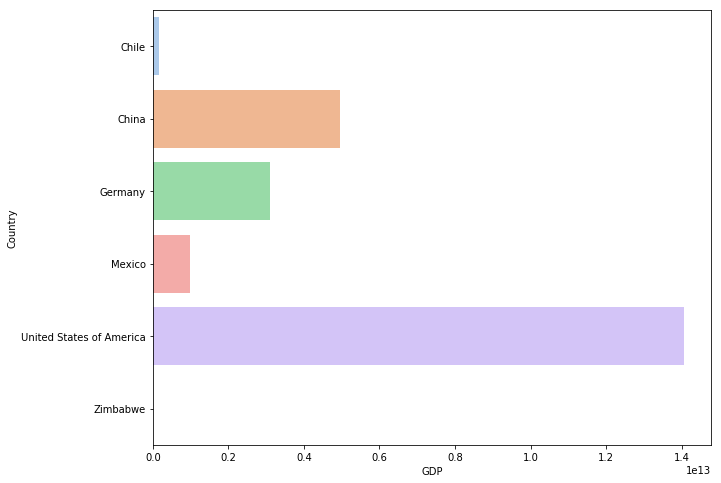

In [87]:
plt.figure(figsize = (10,8))
sns.set_palette('pastel')
sns.barplot(data = dfMean, x = 'GDP', y = 'Country')
plt.show()

# This bar plot shows that the USA has the highest GDP by quite a lot. The other countries are all closer with zimbabwe
# and chile both barely registering on the graph. Possibly a better way to show the disparity in wealth.

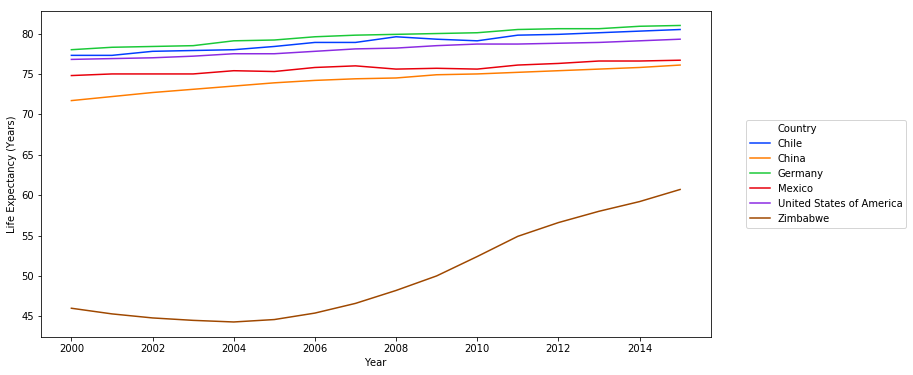

In [76]:
plt.figure(figsize = (12,6))
sns.set_palette('bright')
sns.lineplot(data = df, x = 'Year', y = 'Life_Exp', hue = 'Country')
plt.ylabel('Life Expectancy (Years)')
plt.legend(loc= 7, bbox_to_anchor=(1.3,0.5))
plt.show()

# Shows the life expectancy change year on year with all countries trneding upwards, in the right direction. And zimbabwe
# showing the greatest upward trend. Drastically changing their life expectancy in a short 15 year period.

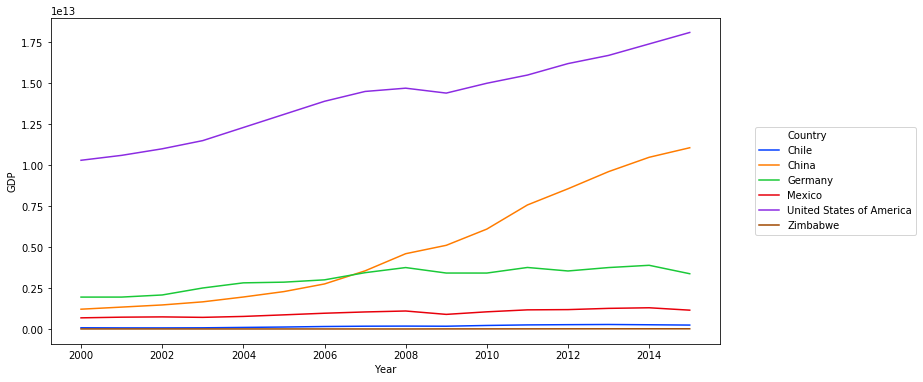

In [86]:
plt.figure(figsize = (12,6))
sns.set_palette('bright')
sns.lineplot(data = df, x = 'Year', y = 'GDP', hue = 'Country')
plt.legend(loc= 7, bbox_to_anchor=(1.3,0.5))
plt.show()

# This displays the gdp growth by year. plotting these individually may be more helpful as only the USA and china
# seem to be comparable in this context whereas there might have been relatively large economic growth in other countries.

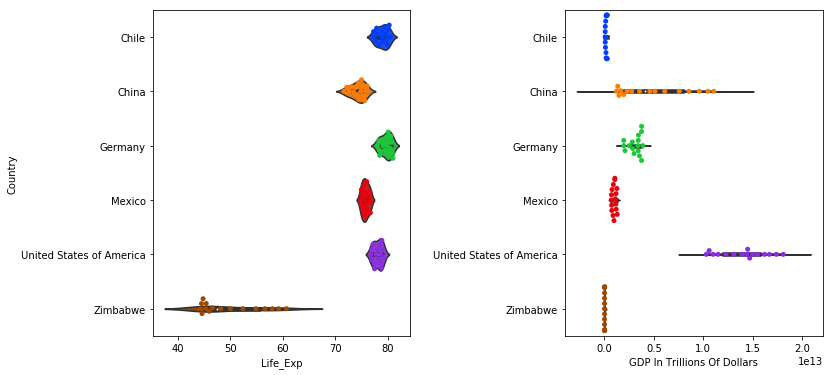

In [107]:
plt.figure(figsize = (12,6))
sns.set_palette('bright')
ax1 = plt.subplot(1,2,1)
sns.violinplot(data = df, x = 'Life_Exp', y = 'Country')
sns.swarmplot(data = df, x = 'Life_Exp', y = 'Country')

ax2 = plt.subplot(1,2,2)
sns.violinplot(data = df, x = 'GDP', y = 'Country')
sns.swarmplot(data = df, x = 'GDP', y = 'Country')
ax2.set_ylabel('')
ax2.set_xlabel('GDP In Trillions Of Dollars')
plt.subplots_adjust(wspace = .6)
plt.show()

# By overlapping a swarm and violin plot the growth of each statistic can be seen more clearly with zimbabwe having the most
# drastic change in life expectancy. And the USA and china having a comparable growth in GDP in recent years.

In [111]:
USA = df[df['Country'] == 'United States of America']
China = df[df['Country'] == 'China']
Germany = df[df['Country'] == 'Germany']
Chile = df[df['Country'] == 'Chile']
Mexico = df[df['Country'] == 'Mexico']
Zimbabwe = df[df['Country'] == 'Zimbabwe']

# splits each country into its own new dataframe so that individual plots can be easily made

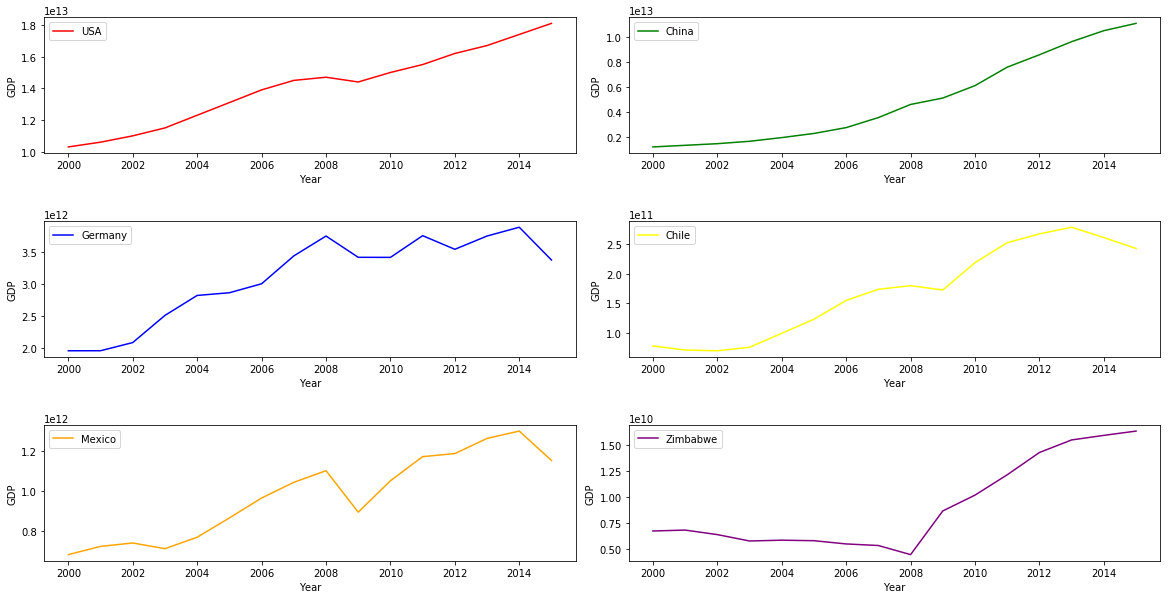

In [126]:
plt.figure(figsize = (20,10))

ax1 = plt.subplot(3,2,1)
sns.lineplot(data = USA, x = 'Year', y = 'GDP', color = 'red')
plt.legend(['USA'])
ax2 = plt.subplot(3,2,2)
sns.lineplot(data = China, x = 'Year', y = 'GDP', color = 'green')
plt.legend(['China'])
ax3 = plt.subplot(3,2,3)
sns.lineplot(data = Germany, x = 'Year', y = 'GDP', color = 'blue')
plt.legend(['Germany'])
ax4 = plt.subplot(3,2,4)
sns.lineplot(data = Chile, x = 'Year', y = 'GDP', color = 'yellow')
plt.legend(['Chile'])
ax5 = plt.subplot(3,2,5)
sns.lineplot(data = Mexico, x = 'Year', y = 'GDP', color = 'orange')
plt.legend(['Mexico'])
ax6 = plt.subplot(3,2,6)
sns.lineplot(data = Zimbabwe, x = 'Year', y = 'GDP', color = 'purple')
plt.legend(['Zimbabwe'])
plt.subplots_adjust(hspace = 0.5, wspace = 0.1)
plt.show()

# This shows that even though the USA and China had greater growth the other countries still had a positve trend relative
# to the initial GDP. A percentage increase graph comparison may help to show how well the countries improved their own GDP

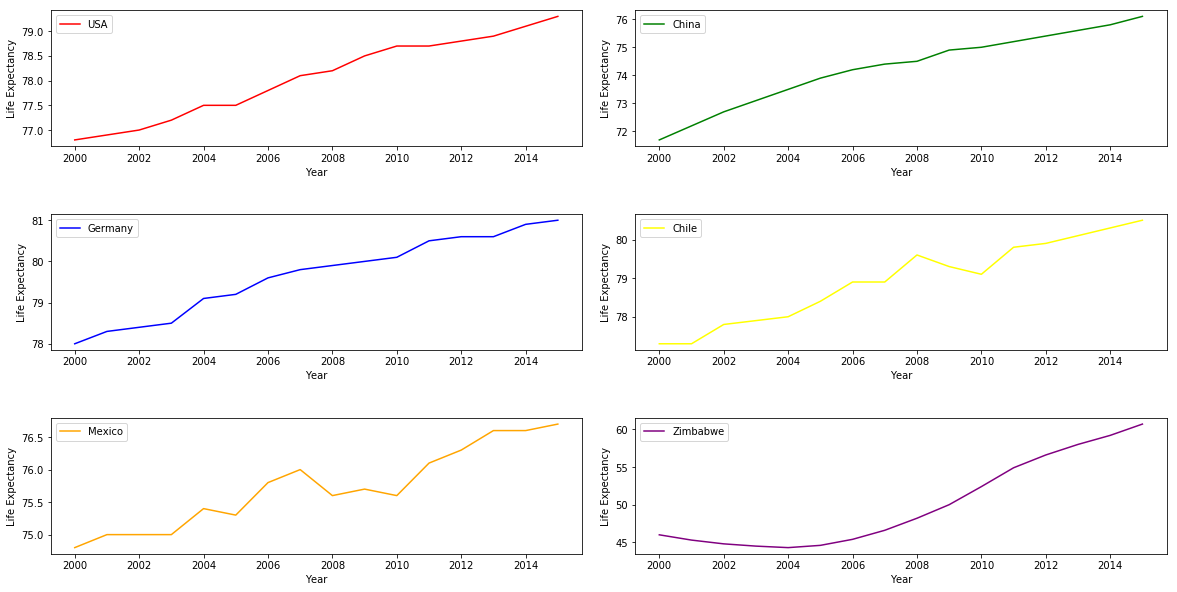

In [131]:
plt.figure(figsize = (20,10))

ax1 = plt.subplot(3,2,1)
sns.lineplot(data = USA, x = 'Year', y = 'Life_Exp', color = 'red')
plt.ylabel('Life Expectancy')
plt.legend(['USA'])
ax2 = plt.subplot(3,2,2)
sns.lineplot(data = China, x = 'Year', y = 'Life_Exp', color = 'green')
plt.ylabel('Life Expectancy')
plt.legend(['China'])
ax3 = plt.subplot(3,2,3)
sns.lineplot(data = Germany, x = 'Year', y = 'Life_Exp', color = 'blue')
plt.ylabel('Life Expectancy')
plt.legend(['Germany'])
ax4 = plt.subplot(3,2,4)
sns.lineplot(data = Chile, x = 'Year', y = 'Life_Exp', color = 'yellow')
plt.ylabel('Life Expectancy')
plt.legend(['Chile'])
ax5 = plt.subplot(3,2,5)
sns.lineplot(data = Mexico, x = 'Year', y = 'Life_Exp', color = 'orange')
plt.ylabel('Life Expectancy')
plt.legend(['Mexico'])
ax6 = plt.subplot(3,2,6)
sns.lineplot(data = Zimbabwe, x = 'Year', y = 'Life_Exp', color = 'purple')
plt.ylabel('Life Expectancy')
plt.legend(['Zimbabwe'])
plt.subplots_adjust(hspace = 0.5, wspace = 0.1)
plt.show()

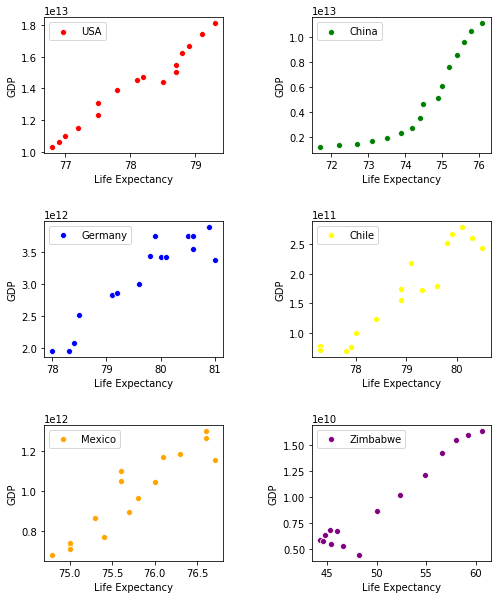

In [136]:
plt.figure(figsize = (8,10))

ax1 = plt.subplot(3,2,1)
sns.scatterplot(data = USA, x = 'Life_Exp', y = 'GDP', color = 'red')
plt.xlabel('Life Expectancy')
plt.legend(['USA'])
ax2 = plt.subplot(3,2,2)
sns.scatterplot(data = China, x = 'Life_Exp', y = 'GDP', color = 'green')
plt.xlabel('Life Expectancy')
plt.legend(['China'])
ax3 = plt.subplot(3,2,3)
sns.scatterplot(data = Germany, x = 'Life_Exp', y = 'GDP', color = 'blue')
plt.xlabel('Life Expectancy')
plt.legend(['Germany'])
ax4 = plt.subplot(3,2,4)
sns.scatterplot(data = Chile, x = 'Life_Exp', y = 'GDP', color = 'yellow')
plt.xlabel('Life Expectancy')
plt.legend(['Chile'])
ax5 = plt.subplot(3,2,5)
sns.scatterplot(data = Mexico, x = 'Life_Exp', y = 'GDP', color = 'orange')
plt.xlabel('Life Expectancy')
plt.legend(['Mexico'])
ax6 = plt.subplot(3,2,6)
sns.scatterplot(data = Zimbabwe, x = 'Life_Exp', y = 'GDP', color = 'purple')
plt.xlabel('Life Expectancy')
plt.legend(['Zimbabwe'])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.show()

# I don't believe this data was terribly interesting and overall the main takeaway is that, shockingly, their is 
# a positively correlated link between gdp and life expectancy.